In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats

# Problem 1

### 1a) Which algorithm makes the fewest mistakes?

The first algorithm makes the fewest mistakes. There are 8 total errors in the first algorithm and 12 in the second.

### 1b) Which algorithm is better for the zoo? Explain.

The second algorithm is better for the zoo given the information that human mischaracterizations are less costly than birt mischaracterizations.

### 1c) During the pandemic the number of visitors plummets, and it is only the zoo keeper visiting. So instead of 52% of the photos taken at the aviary door being people, it is now only 1%. Make new truth tables for both algorithms.


In [3]:
data = {'True Bird': [93,6],
        'True Person': [0,1]}

df = pd.DataFrame(data, index=['NN Birds','NN Humans'])

print (df)

           True Bird  True Person
NN Birds          93            0
NN Humans          6            1


In [4]:
data = {'True Bird': [97,2],
        'True Person': [0,1]}

df = pd.DataFrame(data, index=['NA Birds','NA Humans'])

print (df)

           True Bird  True Person
NA Birds          97            0
NA Humans          2            1


# Problem 2

In the last lab we explored how to numerically calculate the pdf of a summed or averaged observation through repeated convolutions. But sometimes the convolution has an analytical solution. We could have found this out by either using a sharp pencil and doing the convolution integral by hand, or by looking it up in a table (much easier).

Having an analytic answer is much nicer when they exist, so it is always good to look and see if it exists. Further, sums and averages are only some of the mathematical operations that we can perform. In this section we will do an internet scavenger hunt to find the analytic pdf for some interesting distributions.

## Example 1

### What is the sum of two Guassian distributions?

   We did this numerically in the last lab, but we can find it analytically. One might start with this page on the normal distribution which would refer you to this page on the sum, which would give you the same answer you figured out last week.


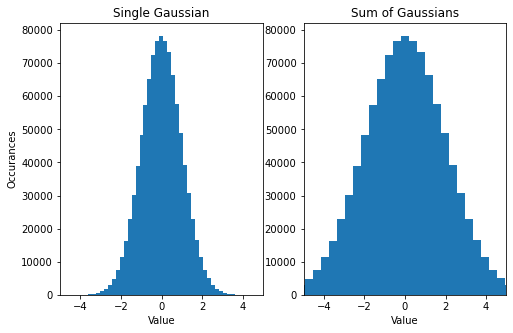

In [33]:
fig, axes = plt.subplots(nrows=1,ncols = 2,figsize = (8,5))

p = stats.norm.rvs(size = 1000000)
pp = p+p
axes[0].hist(p,50)
axes[0].set_xlim(-5,5)
axes[0].set_title('Single Gaussian')
axes[0].set_ylabel('Occurances')
axes[0].set_xlabel('Value')

axes[1].hist(pp,50)
axes[1].set_xlim(-5,5)
axes[1].set_title('Sum of Gaussians')
axes[1].set_xlabel('Value')
plt.show()

# Example 2

### 2a) What is the pdf of the sum of two identical exponential distributions?


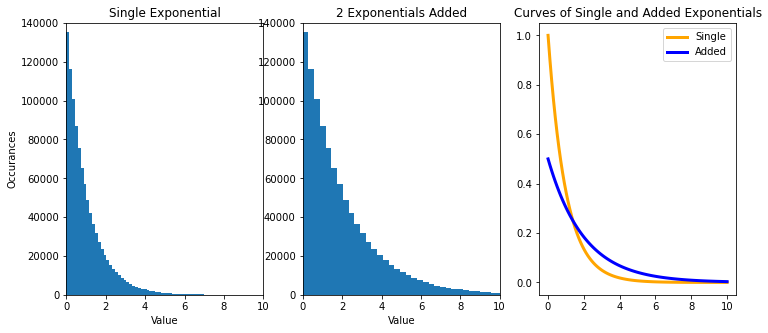

In [34]:
fig, ax = plt.subplots(nrows=1,ncols = 3,figsize = (12,5))


ex = stats.expon.rvs(loc =0, size = 1000000)
ax[0].hist(ex,100)
ax[0].set_xlim(0,10)
ax[0].set_ylim(0,140000)
ax[0].set_title('Single Exponential')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Occurances')

ex2 = ex+ex
ax[1].hist(ex2,100)
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,140000)
ax[1].set_title('2 Exponentials Added')
ax[1].set_xlabel('Value')

x = np.linspace(0,10,100)

ax[2].plot(x,stats.expon.pdf(x,loc = 0., scale = 1),linewidth = 3, alpha = 1, color = 'orange', label = 'Single')
ax[2].plot(x,stats.expon.pdf(x,loc = 0., scale = 2),linewidth = 3, alpha = 1, color = 'blue', label = 'Added')
ax[2].set_title('Curves of Single and Added Exponentials')
ax[2].legend()
plt.show()

### 2b) What is the pdf of the ratio of two zero-mean unity variance normal distributions X1/X2?

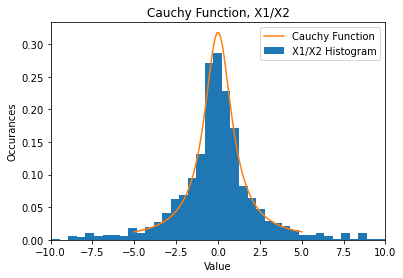

In [35]:
n = stats.norm.rvs(loc = 0, scale = 1, size = 1000)
nn = stats.norm.rvs(loc = 0, scale = 1, size = 1000)
plt.hist(n/nn,2500, density = True, label = 'X1/X2 Histogram')
plt.xlim(-10,10)



x= np.linspace(-5,5,100)
nl = stats.cauchy.pdf(x,loc = 0, scale = 1)
plt.plot(x,nl, label = 'Cauchy Function')
plt.title('Cauchy Function, X1/X2')
plt.xlabel('Value')
plt.ylabel('Occurances')
plt.legend()
plt.show()

The ratio of two zero-mean unity variance normal distributions produces a Cauchy Distrobution, which is defined as such.

### 2c) So far we have looked at 1D probability distributions, but it is possible to have a multi-dimensional vector distribution. A simple first introduction is the 2D Guassian; it looks like a smeared spot. Mathematically this is given by Xi^+Yj^ where both X and Y are drawn from 1D Gaussian distributions. If I measure the amplitude of this vector, what is its pdf? (Hint, the amplitude is always positive.)

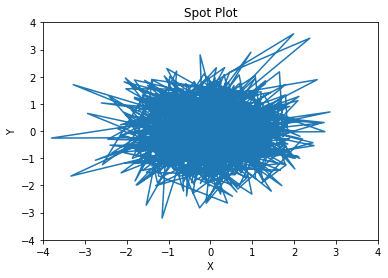

In [37]:
x= np.linspace(-5,5,10000)
Y = stats.norm.rvs(loc = 0, size = 1000)
X = stats.norm.rvs(loc = 0, size = 1000)
plt.plot(X,Y)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Spot Plot')
plt.show()

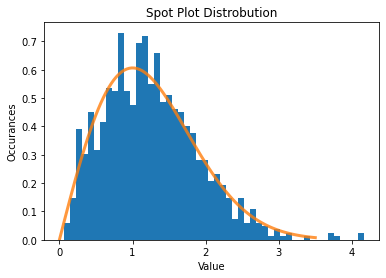

In [39]:
yy = (X**2+Y**2)**0.5
plt.hist(yy, 50, density = True)
x= np.linspace(0,3.5,100)
nl = stats.rayleigh.pdf(x,loc = 0, scale = 1)
plt.plot(x,nl, label = 'Rayleigh', lw = 3, alpha = 0.8)
plt.title('Spot Plot Distrobution')
plt.xlabel('Value')
plt.ylabel('Occurances')
plt.show()


The distrobution of the spot plot seems to be a rayleigh function distrobution. A curve was included to show the relationship.